# *************************************************************************** #
# *************************************************************************** #
# TP11 : CODES CORRECTEURS D'ERREURS ALGEBRIQUES                              #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************

Le code [7, 4] Hamming Code over GF(2) a pour matrice
[1 0 0 0 0 1 1]
[0 1 0 0 1 0 1]
[0 0 1 0 1 1 0]
[0 0 0 1 1 1 1]
et pour distance minimale d= 3
# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************

La matrice génératrice du code est
[ 1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  6 10 

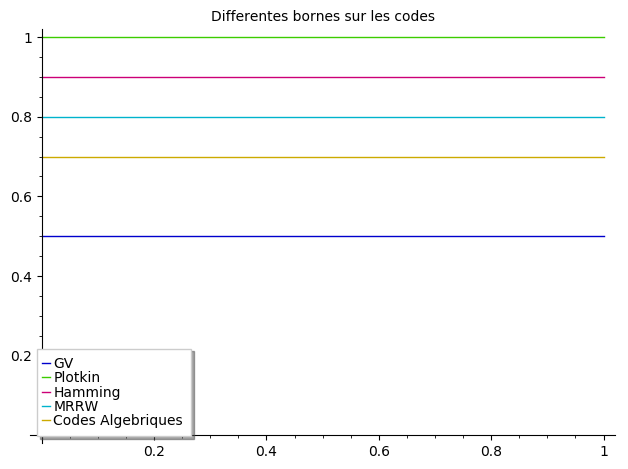

In [612]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP11 : CODES CORRECTEURS D'ERREURS ALGEBRIQUES                              #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

C = codes.HammingCode(GF(2),3)

# Code pour l'EXERCICE

B = C.generator_matrix() # a completer
d = C.minimum_distance() # a completer

# # Affichage des resultats

print "Le code",C,"a pour matrice"
print B
print "et pour distance minimale d=",d

reset()
import numpy as np
print("""\
# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=13
Fq = FiniteField(q)
k=5
alpha=Fq(6)
PolFq.<x> = PolynomialRing(Fq)
r = vector(Fq,[5,2,9,9,1,11,7,5,7,4,3,1])



# Code pour l'EXERCICE

n = len(r)

G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))


H = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(1,n-k+1)]))

# calculate syndrome
s = list(H*r)

sigma = berlekamp_massey(s[:len(s)-1]).reverse()

# calculate positions of error
roots = sigma.roots(multiplicities=false)
coef = sigma.list()[sigma.degree()]
alpha_roots = [coef*root for root in roots]
M = []
for root in alpha_roots:
    for j in range(n):
        if root == alpha^j:
            M.append(j)

# deletes positions and solves new linear system if possible

if M != [] and len(M) < ((n-k)/2):
    Gp = np.delete(G,M,axis = 1)
    rp = np.delete(r,M)

    Gp = matrix(Fq,Gp)
    rp = vector(Fq,rp)
else:
    Gp = G
    rp = r
    
m = Gp.solve_left(rp)

# # Affichage des resultats

print "La matrice génératrice du code est"
print G
print "La matrice de controle du code est"
print H
print "Le syndrome est"
print s
print "Le polynome localisateur d'erreurs est"
print sigma
print "La position des erreurs est"
print M
print "Le message envoye le plus probable est"
print m

print "\nAnother Test:\n"
# Another test:

n = 10
q=11
Fq = FiniteField(q)
k=5
alpha=Fq(6)
PolFq.<x> = PolynomialRing(Fq)

ms = vector(Fq,[1,10,2,0,0])

G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))


H = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(1,n-k+1)]))


c = ms*G
print 'message = ', ms
print 'encoding = ', c
r = c
r[0] = 1
r[1] = 5
print 'error in encoding = ', r



# calculate syndrome
s = list(H*r)

sigma = berlekamp_massey(s[:len(s)-1]).reverse()

# calculate positions of error
roots = sigma.roots(multiplicities=false)
coef = sigma.list()[sigma.degree()]
alpha_roots = [coef*root for root in roots]
M = []
for root in alpha_roots:
    for j in range(n):
        if root == alpha^j:
            M.append(j)

# deletes positions and solves new linear system if possible

if M != [] and len(M) < ((n-k)/2):
    Gp = np.delete(G,M,axis = 1)
    rp = np.delete(r,M)

    Gp = matrix(Fq,Gp)
    rp = vector(Fq,rp)
else:
    Gp = G
    rp = r
    
m = Gp.solve_left(rp)


print "The decoded message is ", m


reset()
print("""\
# ****************************************************************************
# DECODAGE EN LISTE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=23
Fq = FiniteField(q)
k = 3
alpha=Fq(14)
MPol.<x,y>=PolynomialRing(Fq,2)
 
r=vector(Fq, [12,18,15,22,17,5,14,21,17,4,13,8,4,10, 15,11,22,12,13,9,14,12])

# Code pour l'EXERCICE

n = len(r)

b1=floor((n-k)/2)

b2=floor(n - sqrt(n*2*(k-1)))


# generates lis of monomials st ij>= 0 and i+2j<8
M_eval = []
monomials = []

for i in range(b2):
    for j in range(floor(b2/2)):
        if ((i+2*j) < b2):
            monomials.append(x^(i)*(y^(j)))

# generates evaluation matrix of monomials st ij>= 0 and i+2j<8
M_eval = []
for ip in range(n):
    temp = []
    for i in range(b2):
        for j in range(floor(b2/2)):
            if ((i+2*j) < b2):
                temp.append(alpha^(i*ip)*(r[ip]^j))
    M_eval.append(temp)

M_eval = matrix(Fq,M_eval)

# calculate basis of M_eval and generates corresponding polynomials factoring
basis = M_eval.T.kernel().basis()

polynomes = []
for i in range(len(basis)):
    base = list(basis[i])
    poly = 0
    for j in range(len(base)):
        poly += (monomials[j]*base[j])
    #print '\nbase = ',base ,'\npolynomial\n',poly
    polynomes.append(MPol(poly).factor())

# find common factors appearing n-t times of the form p(x) = f(x,y) - y
polynomes_eval = []
for i in range(len(polynomes)):
    poly = polynomes[i]
    for j in range(len(polynomes[i])):
        factor = polynomes[i][j][0]
        #print 'factor = ', factor
        # here must compare with other polynomes
        count = 0
        for ip in range(len(polynomes)):
            if ip != i:
                polyp = polynomes[ip]
                found_common = False
                for jp in range(len(polynomes[ip])):
                    factorp = polynomes[ip][jp][0]
                    #print 'i,j = ',i,' ',ip,'\nfactor = ', factor , 'factorp = ', factorp
                    if factor == factorp and found_common == False:
                        found_common = True
                        count += 1
        # factor(x,y) = fk(x,y) - y 
        if count >= (n-b2) and not(-1*factor + y in polynomes_eval):
            # check if contains y (again, there must be another way...)
            ptemp = -1*factor + y
            if ptemp(y=0) == ptemp(y=9999) and ptemp(y=-1) == ptemp(y=1):
                polynomes_eval.append(ptemp)

# evaluates on alpha and obtains codes
L = []
for poly in polynomes_eval:
    evaluation = []
    for j in range(n):
        evaluation.append(poly(x = alpha^j))
    L.append(evaluation)
    
L = matrix(Fq,L)
    
    
# need to create RS encoding
G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))

    
M = []
for l in L:
    M.append(G.solve_left(l))

messages = []
for l in M:
    word = ''
    for letter in l:
        word += chr(64+int(letter))
    messages.append(word)

# maximum likehood (again, prioritized getting things done)
likehood = []
for i in L:
    likehood.append(0)
for i in range(len(likehood)):
    for j in range(len(r)):
        if L[i][j] == r[j]:
            likehood[i] += 1
like_idx = likehood.index(max(likehood))

c = L[like_idx]
m = messages[like_idx]

# # Affichage des resultats

print "Le decodage unique fonctionne jusqu'à distance",b1
print "Le decodage de Sudan fonctionne jusqu'à distance",b2
print "La liste des mots de code les plus proches de r est\n",L
print "Elle correspond aux messages"
print M
print "Le mot de code le plus probable est",c
print "soit le message",m



reset()
print("""\
# ****************************************************************************
# CODE ALGEBRIQUE
# ****************************************************************************
""")


# ESSAYEZ DE LE TRAITER
# CET EXERCICE NE SERA PAS EVALUE
# IL VOUS MANQUE LE THEOREME DE RIEMANN-ROCH POUR TOUT COMPRENDRE


reset()
print("""\
# ****************************************************************************
# BORNES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=49

# Code pour l'EXERCICE

gv = 1/2
plotkin = 1
hamming = .9
mrrw = .8

# # Affichage des resultats

plot([gv,plotkin,hamming,mrrw],xmin=0,xmax=1,ymin=0,ymax=1, legend_label=["GV","Plotkin","Hamming","MRRW"],title="Differentes bornes sur les codes")

print("""\
# ****************************************************************************
# BORNES BATTANT GILBERT-VARSHAMOV
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

# Code pour l'EXERCICE

codesalg = .7

# # Affichage des resultats

plot([gv,plotkin,hamming,mrrw,codesalg],xmin=0,xmax=1,ymin=0,ymax=1, legend_label=["GV","Plotkin","Hamming","MRRW","Codes Algebriques"],title="Differentes bornes sur les codes")


### Question 465

In [3]:
reset()
print("""\
# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

C = codes.HammingCode(GF(2),3)

# Code pour l'EXERCICE

B = C.generator_matrix() # a completer
d = C.minimum_distance() # a completer

# # Affichage des resultats

print "Le code",C,"a pour matrice"
print B
print "et pour distance minimale d=",d



# ****************************************************************************
# CODE DE HAMMING
# ****************************************************************************

Le code [7, 4] Hamming Code over GF(2) a pour matrice
[1 0 0 0 0 1 1]
[0 1 0 0 1 0 1]
[0 0 1 0 1 1 0]
[0 0 0 1 1 1 1]
et pour distance minimale d= 3


### Question 477

In [263]:
reset()
import numpy as np
print("""\
# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=13
Fq = FiniteField(q)
k=5
alpha=Fq(6)
PolFq.<x> = PolynomialRing(Fq)
r = vector(Fq,[5,2,9,9,1,11,7,5,7,4,3,1])



# Code pour l'EXERCICE

n = len(r)

G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))


H = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(1,n-k+1)]))

# calculate syndrome
s = list(H*r)

sigma = berlekamp_massey(s[:len(s)-1]).reverse()

# calculate positions of error
roots = sigma.roots(multiplicities=false)
coef = sigma.list()[sigma.degree()]
alpha_roots = [coef*root for root in roots]
M = []
for root in alpha_roots:
    for j in range(n):
        if root == alpha^j:
            M.append(j)

# deletes positions and solves new linear system if possible

if M != [] and len(M) < ((n-k)/2):
    Gp = np.delete(G,M,axis = 1)
    rp = np.delete(r,M)

    Gp = matrix(Fq,Gp)
    rp = vector(Fq,rp)
else:
    Gp = G
    rp = r
    
m = Gp.solve_left(rp)

# # Affichage des resultats

print "La matrice génératrice du code est"
print G
print "La matrice de controle du code est"
print H
print "Le syndrome est"
print s
print "Le polynome localisateur d'erreurs est"
print sigma
print "La position des erreurs est"
print M
print "Le message envoye le plus probable est"
print m

print "\nAnother Test:\n"
# Another test:

n = 10
q=11
Fq = FiniteField(q)
k=5
alpha=Fq(6)
PolFq.<x> = PolynomialRing(Fq)

ms = vector(Fq,[1,10,2,0,0])

G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))


H = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(1,n-k+1)]))


c = ms*G
print 'message = ', ms
print 'encoding = ', c
r = c
r[0] = 1
r[1] = 5
print 'error in encoding = ', r



# calculate syndrome
s = list(H*r)

sigma = berlekamp_massey(s[:len(s)-1]).reverse()

# calculate positions of error
roots = sigma.roots(multiplicities=false)
coef = sigma.list()[sigma.degree()]
alpha_roots = [coef*root for root in roots]
M = []
for root in alpha_roots:
    for j in range(n):
        if root == alpha^j:
            M.append(j)

# deletes positions and solves new linear system if possible

if M != [] and len(M) < ((n-k)/2):
    Gp = np.delete(G,M,axis = 1)
    rp = np.delete(r,M)

    Gp = matrix(Fq,Gp)
    rp = vector(Fq,rp)
else:
    Gp = G
    rp = r
    
m = Gp.solve_left(rp)


print "The decoded message is ", m

# ****************************************************************************
# DECODAGE DE BERLEKAMP-MASSEY
# ****************************************************************************

La matrice génératrice du code est
[ 1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  6 10  8  9  2 12  7  3  5  4 11]
[ 1 10  9 12  3  4  1 10  9 12  3  4]
[ 1  8 12  5  1  8 12  5  1  8 12  5]
[ 1  9  3  1  9  3  1  9  3  1  9  3]
La matrice de controle du code est
[ 1  6 10  8  9  2 12  7  3  5  4 11]
[ 1 10  9 12  3  4  1 10  9 12  3  4]
[ 1  8 12  5  1  8 12  5  1  8 12  5]
[ 1  9  3  1  9  3  1  9  3  1  9  3]
[ 1  2  4  8  3  6 12 11  9  5 10  7]
[ 1 12  1 12  1 12  1 12  1 12  1 12]
[ 1  7 10  5  9 11 12  6  3  8  4  2]
Le syndrome est
[3, 0, 10, 0, 3, 0, 10]
Le polynome localisateur d'erreurs est
x^2 + 1
La position des erreurs est
[3, 9]
Le message envoye le plus probable est
(1, 0, 3, 12, 2)

Another Test:

message =  (1, 10, 2, 0, 0)
encoding =  (2, 1, 5, 4, 0, 4, 2, 0, 7, 7)
error in encoding =

### Question 482


In [611]:
reset()
print("""\
# ****************************************************************************
# DECODAGE EN LISTE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

q=23
Fq = FiniteField(q)
k = 3
alpha=Fq(14)
MPol.<x,y>=PolynomialRing(Fq,2)
 
r=vector(Fq, [12,18,15,22,17,5,14,21,17,4,13,8,4,10, 15,11,22,12,13,9,14,12])

# Code pour l'EXERCICE

n = len(r)

b1=floor((n-k)/2)

b2=floor(n - sqrt(n*2*(k-1)))


# generates lis of monomials st ij>= 0 and i+2j<8
M_eval = []
monomials = []

for i in range(b2):
    for j in range(floor(b2/2)):
        if ((i+2*j) < b2):
            monomials.append(x^(i)*(y^(j)))

# generates evaluation matrix of monomials st ij>= 0 and i+2j<8
M_eval = []
for ip in range(n):
    temp = []
    for i in range(b2):
        for j in range(floor(b2/2)):
            if ((i+2*j) < b2):
                temp.append(alpha^(i*ip)*(r[ip]^j))
    M_eval.append(temp)

M_eval = matrix(Fq,M_eval)

# calculate basis of M_eval and generates corresponding polynomials factoring
basis = M_eval.T.kernel().basis()

polynomes = []
for i in range(len(basis)):
    base = list(basis[i])
    poly = 0
    for j in range(len(base)):
        poly += (monomials[j]*base[j])
    #print '\nbase = ',base ,'\npolynomial\n',poly
    polynomes.append(MPol(poly).factor())

# find common factors appearing n-t times of the form p(x) = f(x,y) - y
polynomes_eval = []
for i in range(len(polynomes)):
    poly = polynomes[i]
    for j in range(len(polynomes[i])):
        factor = polynomes[i][j][0]
        #print 'factor = ', factor
        # here must compare with other polynomes
        count = 0
        for ip in range(len(polynomes)):
            if ip != i:
                polyp = polynomes[ip]
                found_common = False
                for jp in range(len(polynomes[ip])):
                    factorp = polynomes[ip][jp][0]
                    #print 'i,j = ',i,' ',ip,'\nfactor = ', factor , 'factorp = ', factorp
                    if factor == factorp and found_common == False:
                        found_common = True
                        count += 1
        # factor(x,y) = fk(x,y) - y 
        if count >= (n-b2) and not(-1*factor + y in polynomes_eval):
            # check if contains y (again, there must be another way...)
            ptemp = -1*factor + y
            if ptemp(y=0) == ptemp(y=9999) and ptemp(y=-1) == ptemp(y=1):
                polynomes_eval.append(ptemp)

# evaluates on alpha and obtains codes
L = []
for poly in polynomes_eval:
    evaluation = []
    for j in range(n):
        evaluation.append(poly(x = alpha^j))
    L.append(evaluation)
    
L = matrix(Fq,L)
    
    
# need to create RS encoding
G = ( matrix([[z^j for z in [alpha^i
for i in range(n)] ] for j in range(k)]))

    
M = []
for l in L:
    M.append(G.solve_left(l))

messages = []
for l in M:
    word = ''
    for letter in l:
        word += chr(64+int(letter))
    messages.append(word)

# maximum likehood (again, prioritized getting things done)
likehood = []
for i in L:
    likehood.append(0)
for i in range(len(likehood)):
    for j in range(len(r)):
        if L[i][j] == r[j]:
            likehood[i] += 1
like_idx = likehood.index(max(likehood))

c = L[like_idx]
m = messages[like_idx]

# # Affichage des resultats

print "Le decodage unique fonctionne jusqu'à distance",b1
print "Le decodage de Sudan fonctionne jusqu'à distance",b2
print "La liste des mots de code les plus proches de r est\n",L
print "Elle correspond aux messages"
print M
print "Le mot de code le plus probable est",c
print "soit le message",m



# ****************************************************************************
# DECODAGE EN LISTE
# ****************************************************************************

Le decodage unique fonctionne jusqu'à distance 9
Le decodage de Sudan fonctionne jusqu'à distance 12
La liste des mots de code les plus proches de r est
[13 17 15  4  8  5 14 16  5  4  9  8 16  1 15  1 22 22 13  9 14 11]
[13 18 22 22 17  2 15 21 17  9 13 12  4 10 15 11 10 12  2  4 11 18]
Elle correspond aux messages
[(11, 14, 11), (21, 12, 3)]
Le mot de code le plus probable est (13, 18, 22, 22, 17, 2, 15, 21, 17, 9, 13, 12, 4, 10, 15, 11, 10, 12, 2, 4, 11, 18)
soit le message ULC
